<a href="https://colab.research.google.com/github/Thulyasri/dv-assignment/blob/main/Stirling_parking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VISUALIZING PARKING SPACES ON MAP**

1.Importing libraries:

In this code, two dataset are used


*   folium to create interactive map
*   json to load the dataset

2.Load GeoJSON:

This code opens and reads a GeoJSON file containing parking spaces data for Stirling. If any errors occur during the file loading process, it prints an error message with details about the exception. The loaded GeoJSON data is stored in the variable data. Ensure to replace the file path with the actual path to your GeoJSON file.

3.Adding markers:

This reads GeoJSON data of parking spaces in Stirling, iterates through each feature, and adds blue polygons and markers for single Polygons and green polygons and markers for MultiPolygons. Markers include popup information, specifically the 'name' property, if available. Any errors during processing are printed for debugging.








In [ ]:
!pip install folium

import folium
import json

# Load GeoJSON data for parking spaces in Stirling (replace with your file path)
try:
    with open('/content/Stirling parking.geojson') as f:
        data = json.load(f)
except Exception as e:
    print(f"Error loading GeoJSON: {e}")
    raise

# Create a map centered at a specific location (Stirling)
stirling_map = folium.Map(location=[56.1165, -3.9369], zoom_start=13)

# Iterate over the features and add markers to the map
for feature in data['features']:
    try:
        if feature['geometry']['type'] == 'Polygon':
            coordinates = feature['geometry']['coordinates'][0]
            folium.Polygon(locations=coordinates, color='blue', fill=True, fill_color='blue').add_to(stirling_map)

            # Add marker for parking space with its name if 'name' property exists
            if 'properties' in feature and 'name' in feature['properties']:
                center_lat = sum(p[1] for p in coordinates) / len(coordinates)
                center_lon = sum(p[0] for p in coordinates) / len(coordinates)
                folium.Marker([center_lat, center_lon], popup=feature['properties']['name'], icon=folium.Icon(color='blue')).add_to(stirling_map)

        elif feature['geometry']['type'] == 'MultiPolygon':
            coordinates = feature['geometry']['coordinates'][0][0]
            folium.Polygon(locations=coordinates, color='green', fill=True, fill_color='green').add_to(stirling_map)

            # Add marker for parking space with its name if 'name' property exists
            if 'properties' in feature and 'name' in feature['properties']:
                center_lat = sum(p[1] for p in coordinates) / len(coordinates)
                center_lon = sum(p[0] for p in coordinates) / len(coordinates)
                folium.Marker([center_lat, center_lon], popup=feature['properties']['name'], icon=folium.Icon(color='green')).add_to(stirling_map)
    except Exception as e:
        print(f"Error processing feature: {e}")

# Display the map
stirling_map


**VISUALIZING PARKING SPACE ON CHART**

1.Importing libraries:

Matplotlib is used

2.Bar chart:

This shows the count of street and alloted parking

3.Pie chart:

This shows the percentage of street and alloted parking

4.Display:

plt.show() is used to display the chart.

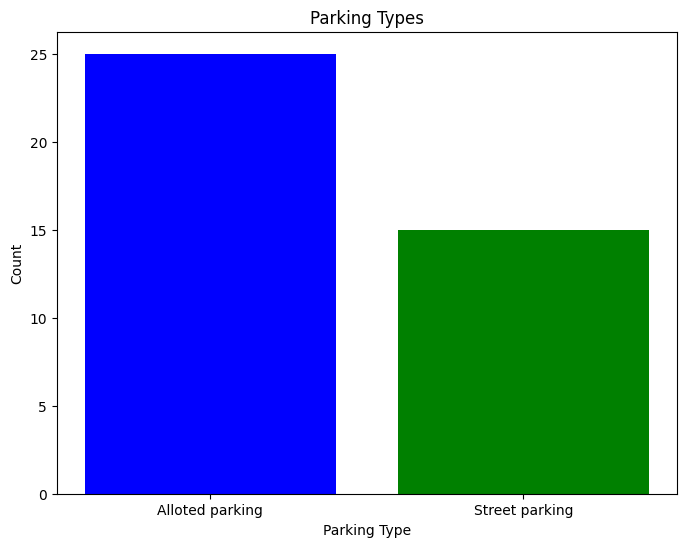

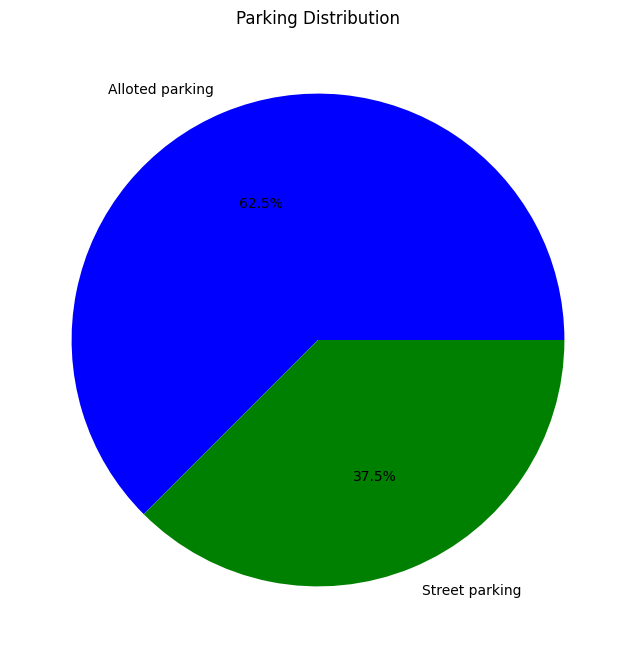

In [1]:
import matplotlib.pyplot as plt

# Hypothetical data for demonstration
parking_types = ['Alloted parking', 'Street parking',]
parking_counts = [25, 15]

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(parking_types, parking_counts, color=['blue', 'green'])
plt.title('Parking Types')
plt.xlabel('Parking Type')
plt.ylabel('Count')
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(parking_counts, labels=parking_types, autopct='%1.1f%%', colors=['blue', 'green', 'orange'])
plt.title('Parking Distribution')
plt.show()
